# Credit Card Fraud Detection

Il dataset contiene transazioni fatte tramite carta di credito nel settembre 2013 in Europa.
Questo dataset presenta transazioni avvenute in due giorni. Delle 284807 transazioni, 492 sono etichettate come frodi, le altre sono da ritenersi legittime. Il dataset è estremamente sbilanciato, con i casi positivi che rappresentano soltanto lo 0.172% di tutte le transazioni.

Nel dataset sono presenti soltanto variabili di input di tipo numerico, risultanti da una trasformazione Principal Component Analysis (PCA). Per ragioni di confidenzialità non sono disponibili né le features originali né informazioni sull'origine dei dati più dettagliate. Le uniche features non trasformate tramite PCA sono 'Tempo' e 'Ammontare'.
Il tempo misura i sencondi trascorsi tra ogni transazione e la prima transazione del dataset. La feature 'Ammontare' è l'ammontare della transazione.
Le transazioni etichettate con 1 sono frodi, quelle etichettate con 0 sono legittime.

Essendo il dataset già curato non sono necessarie operazioni di pulizia ed imputazione dei dati.



## Setup dell'ambiente

Le operazioni di setup sono differenti a seconda della piattaforma utilizzata, ne va utilizzato solo uno, o del codice personalizzato in caso di ambienti diversi.

In [4]:
# Kaggle token
token = {"username":"andreaaugello","key":"636f00800308e8447dea0ee8f2decb98"}

### Google Colaboratory

In [5]:
filepath = "/content/creditfraud/creditcard.csv"

! rm -Rf /content/creditfraud/
! which kaggle || pip install kaggle
! if ! [ -d ~/.kaggle ] ; then  mkdir ~/.kaggle  && touch ~/.kaggle/kaggle.json; echo "Creating kaggle directory"; fi

import json

import zipfile
import os
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

! if ! [ -f /content/creditfraud/creditcard.csv ] ; then chmod 600 /root/.kaggle/kaggle.json && kaggle datasets download -p /content/creditfraud/ -d mlg-ulb/creditcardfraud ; fi

os.chdir('/content/creditfraud')
for file in os.listdir():
    zip_ref = zipfile.ZipFile(file, 'r')
    zip_ref.extractall()
    zip_ref.close()

/usr/local/bin/kaggle
 74% 49.0M/66.0M [00:00<00:00, 53.6MB/s]
100% 66.0M/66.0M [00:00<00:00, 84.8MB/s]


In [6]:
!head -n 2 /content/creditfraud/creditcard.csv
!tail -n 2 /content/creditfraud/creditcard.csv

"Time","V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount","Class"
0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,"0"
172788,-0.240440049680947,0.530482513118839,0.702510230095103,0.689799168040973,-0.377961134444982,0.62370772214768,-0.68617998628885,0.679145459790659,0.392086712465972,-0.399125651432835,-1.93384881505713,-0.962886142890271,-1.04208165591191,0.449624443166001,1.96256312066577,-0.60857

In [7]:
%%shell

apt-get install openjdk-8-jdk-headless -qq  &>/dev/null
if ! [ -f spark-3.1.1-bin-hadoop2.7.tgz ] ; then 
  wget -q http://apache.osuosl.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop2.7.tgz && 
  tar xf spark-3.1.1-bin-hadoop2.7.tgz ; 
fi
pip show findspark &>/dev/null || pip install -q findspark
pip show pyspark &>/dev/null || pip install pyspark

     |████████████████████████████████| 212.3MB 65kB/s 
     |████████████████████████████████| 204kB 49.0MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767604 sha256=f57dbc175d92ad0cdf097da58710e449303cf35e50b617c1b2e00a7de1db9080
  Stored in directory: /root/.cache/pip/wheels/0b/90/c0/01de724414ef122bd05f056541fb6a0ecf47c7ca655f8b3c0f
Successfully built pyspark


In [8]:
# Set up required environment variables

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/creditfraud/spark-3.1.1-bin-hadoop2.7"

! mkdir -p $SPARK_HOME/conf/
! echo "spark.driver.memory              8g" >> $SPARK_HOME/conf/spark-defaults.conf

import findspark
location = findspark.find()
findspark.init(location)

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('CardFraud').getOrCreate()

### Kaggle notebook

È necessario abilitare internet per il notebook, è quindi richiesta la verifica tramite numero di telefono.

In [ ]:
filepath = "../input/creditcardfraud/creditcard.csv"

!head -n 2 ../input/creditcardfraud/creditcard.csv
!tail -n 2 ../input/creditcardfraud/creditcard.csv

"Time","V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount","Class"
0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,"0"
172788,-0.240440049680947,0.530482513118839,0.702510230095103,0.689799168040973,-0.377961134444982,0.62370772214768,-0.68617998628885,0.679145459790659,0.392086712465972,-0.399125651432835,-1.93384881505713,-0.962886142890271,-1.04208165591191,0.449624443166001,1.96256312066577,-0.60857

In [ ]:
! apt-get install openjdk-8-jdk-headless -qq &>/dev/null
! if ! [ -f spark-3.1.1-bin-hadoop2.7.tgz ] ; then \
  wget -q http://apache.osuosl.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop2.7.tgz && \
  tar xf spark-3.1.1-bin-hadoop2.7.tgz ; \
fi
! pip show findspark &>/dev/null || pip install -q findspark
! pip show pyspark &>/dev/null || pip install pyspark

In [ ]:
# Set up required environment variables

# Set up required environment variables

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "./spark-3.1.1-bin-hadoop2.7"


! mkdir -p $SPARK_HOME/conf/
! echo "spark.driver.memory              8g" >> $SPARK_HOME/conf/spark-defaults.conf

import findspark
location = findspark.find()
findspark.init(location)

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('CardFraud').getOrCreate()

### Databricks Community Edition

Con la versione community è necessario caricare manualmente il file .csv nel filesystem distribuito.

In [ ]:
filepath = "dbfs:/FileStore/creditcard.csv"
import mlflow

! rm -Rf /content/creditfraud/
! which kaggle || pip install kaggle
! if ! [ -d ~/.kaggle ] ; then  mkdir ~/.kaggle  && touch ~/.kaggle/kaggle.json; echo "Creating kaggle directory"; fi

import json

import zipfile
import os
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

! if ! [ -f /content/creditfraud/creditcard.csv ] ; then chmod 600 /root/.kaggle/kaggle.json && kaggle datasets download -p /content/creditfraud/ -d mlg-ulb/creditcardfraud ; fi

os.chdir('/content/creditfraud')
for file in os.listdir():
    zip_ref = zipfile.ZipFile(file, 'r')
    zip_ref.extractall()
    zip_ref.close()

/usr/local/bin/kaggle
 89% 59.0M/66.0M [00:00<00:00, 156MB/s]
100% 66.0M/66.0M [00:00<00:00, 189MB/s]


In [ ]:
!head -n 2 /content/creditfraud/creditcard.csv
!tail -n 2 /content/creditfraud/creditcard.csv

"Time","V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount","Class"
0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,"0"
172788,-0.240440049680947,0.530482513118839,0.702510230095103,0.689799168040973,-0.377961134444982,0.62370772214768,-0.68617998628885,0.679145459790659,0.392086712465972,-0.399125651432835,-1.93384881505713,-0.962886142890271,-1.04208165591191,0.449624443166001,1.96256312066577,-0.60857

In [ ]:
# Set up required environment variables

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('CardFraud').getOrCreate()

## Analisi dei dati

In [9]:
# Importazione dei dati dal data set 
from pyspark.sql.types import *
from pyspark.sql.functions import *


# costruzione dello schema del DataFrame

creditcard_schema = StructType([
    StructField('Time',IntegerType(),False),
    StructField('V1',FloatType(),False),
    StructField('V2',FloatType(),False),
    StructField('V3',FloatType(),False),
    StructField('V4',FloatType(),False),
    StructField('V5',FloatType(),False),
    StructField('V6',FloatType(),False),
    StructField('V7',FloatType(),False),
    StructField('V8',FloatType(),False),
    StructField('V9',FloatType(),False),
    StructField('V10',FloatType(),False),
    StructField('V11',FloatType(),False),
    StructField('V12',FloatType(),False),
    StructField('V13',FloatType(),False),
    StructField('V14',FloatType(),False),
    StructField('V15',FloatType(),False),
    StructField('V16',FloatType(),False),
    StructField('V17',FloatType(),False),
    StructField('V18',FloatType(),False),
    StructField('V19',FloatType(),False),
    StructField('V20',FloatType(),False),
    StructField('V21',FloatType(),False),
    StructField('V22',FloatType(),False),
    StructField('V23',FloatType(),False),
    StructField('V24',FloatType(),False),
    StructField('V25',FloatType(),False),
    StructField('V26',FloatType(),False),
    StructField('V27',FloatType(),False),
    StructField('V28',FloatType(),False),
    StructField('Amount',FloatType(),False),
    StructField('Class',ShortType(),False),
])

records = spark.read.format('csv')\
    .option('header','true')\
    .option('mode','DROPMALFORMED')\
    .option('mode','PERMISSIVE')\
    .schema(creditcard_schema)\
    .load(filepath)

#records.printSchema()
#records.show()

display(records)
display(records.describe().toPandas())

DataFrame[Time: int, V1: float, V2: float, V3: float, V4: float, V5: float, V6: float, V7: float, V8: float, V9: float, V10: float, V11: float, V12: float, V13: float, V14: float, V15: float, V16: float, V17: float, V18: float, V19: float, V20: float, V21: float, V22: float, V23: float, V24: float, V25: float, V26: float, V27: float, V28: float, Amount: float, Class: smallint]

,summary,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,count,284806,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807
1,mean,94813.84136570156,-2.237831565309384E-10,5.6390376770574364E-11,5.7181949824170215E-11,-5.515661110814551E-11,2.6428014635959684E-11,-1.9836218453151118E-10,-1.1044655188441163E-10,5.3475000568427694E-11,2.419927089644845E-11,5.3895441523821255E-11,-6.56758850695699E-11,4.793081498147977E-11,2.1484545434430527E-11,-8.998896774441982E-11,-4.6294032998024574E-11,-5.987137419976068E-11,3.639741548440692E-11,1.5957350183256596E-11,2.9739322663330695E-11,3.740233772192539E-11,-1.1423847676931417E-11,4.026301784830157E-11,-9.643035035753393E-12,4.7671430945018126E-11,-7.220635637499166E-12,-4.4536415414434063E-11,2.3264761314214363E-11,-1.0009771058213764E-11,88.34961924204623,0.001727485630620034
2,stddev,47488.22832975011,1.958695804149988,1.6513085797790983,1.5162550047888008,1.4158685748057576,1.38024673467619,1.3322710895129717,1.2370935982054971,1.1943529028329143,1.0986320894527717,1.0888497654131535,1.0207130274845488,0.9992013897133897,0.9952742301172138,0.9585956107110349,0.9153160115854574,0.8762528874680678,0.8493370639017923,0.8381762093603176,0.8140405007230054,0.7709250247479664,0.7345240139851617,0.7257015605697456,0.6244602954715794,0.6056470678589732,0.52127807053526,0.48222701319019107,0.4036324945392819,0.33008326434426066,250.12010901734928,0.04152718963546528
3,min,0,-56.40751,-72.71573,-48.32559,-5.6831713,-113.74331,-26.160505,-43.557243,-73.21672,-13.434067,-24.588263,-4.7974734,-18.683714,-5.791881,-19.214325,-4.4989448,-14.129854,-25.1628,-9.498746,-7.213527,-54.49772,-34.830383,-10.933144,-44.807735,-2.836627,-10.295397,-2.6045506,-22.56568,-15.430084,0.0,0
4,max,172792,2.45493,22.05773,9.382559,16.875343,34.801666,73.30163,120.58949,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315111,9.253527,5.041069,5.5919714,39.420906,27.202839,10.50309,22.528412,4.584549,7.5195885,3.5173457,31.612198,33.84781,25691.16,1


Possiamo vedere che in uno dei record manca il campo del tempo, cerchiamo quindi di individuarlo ed, eventualmente, correggere l'errore.

Cerchiamo nel file CSV il record che non inizia con un numero intero.

In [10]:
! grep -v "^[0-9]*," creditcard.csv 

"Time","V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount","Class"
1e+05,-1.40863322829137,-1.624697936324,2.54774230369692,0.385671523516146,0.502790072699087,0.507194721385658,-1.74443114473473,0.760594225747498,3.00170400322912,-1.16309493493591,0.393516209370638,-1.9761080196344,0.231283936059375,0.526783847087809,-3.23246747614055,0.021830807795285,0.519902436567202,1.12642627868296,0.0800098779433671,0.209032736561698,0.21764082393781,0.758246770655715,0.281254134069628,0.736607975853892,-0.741402076374565,0.255349902866452,0.141944167181525,0.228167205092217,49.5,"0"


Risulta essere un record in cui il tempo è scritto in notazione scientifica come $1\cdot 10^{5}$.
Appartiene alla classe delle transazioni legittime già sovrarappresentata, quindi non è molto importante mantenerlo, ma lo correggiamo ugualmente sostituendo il valore `null` con $100000$. 

Essendoci soltanto una riga con tempo nullo possiamo utilizzare la trasformazione `withColumn` senza problemi. 

In [11]:
records = records.withColumn("Time",
                             when(records["Time"].isNull(),
                                  100000) \
                             .otherwise(records["Time"])).dropDuplicates()

display(records.describe().toPandas())

,summary,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,count,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726,283726
1,mean,94811.07759951502,0.0059171496151878295,-0.004134755596655358,0.0016131194013566076,-0.0029663077763300767,0.0018275601352146962,-0.0011394883794042796,0.0018006916556496844,-8.544525275343677E-4,-0.0015961996029800678,-0.0014407104420079613,2.0175758274159E-4,-7.147876010724789E-4,6.033758161790353E-4,2.523172098282817E-4,0.0010428379946567953,0.0011620127510330307,1.7016099417563552E-4,0.0015151660271279712,-2.6426355734881E-4,1.8717529004213355E-4,-3.705931333337562E-4,-1.5027521572740273E-5,1.9817071581241128E-4,2.1420687436297502E-4,-2.3238699909439164E-4,1.4944104385428625E-4,0.001763031635814916,5.473120965431608E-4,88.47268730080253,0.001667101358352777
2,stddev,47481.0478906195,1.9480261419053075,1.6467029644100455,1.508681915996848,1.4141840143251612,1.3770082799610668,1.331930591492362,1.227663895509697,1.1790544275868806,1.0954924812185733,1.0764073502841949,1.0187201524646452,0.9946744452641613,0.9954296367531891,0.9522150895082739,0.914893633435804,0.8736963276905809,0.8425073208639574,0.8373775296067039,0.8133785530591242,0.7699842412764643,0.723909366672215,0.7245504655227913,0.6237023784485339,0.605626698190032,0.5212203166769497,0.48205294076037,0.3957438805701256,0.3280266044291142,250.3994368876579,0.04079617625933865
3,min,0,-56.40751,-72.71573,-48.32559,-5.6831713,-113.74331,-26.160505,-43.557243,-73.21672,-13.434067,-24.588263,-4.7974734,-18.683714,-5.791881,-19.214325,-4.4989448,-14.129854,-25.1628,-9.498746,-7.213527,-54.49772,-34.830383,-10.933144,-44.807735,-2.836627,-10.295397,-2.6045506,-22.56568,-15.430084,0.0,0
4,max,172792,2.45493,22.05773,9.382559,16.875343,34.801666,73.30163,120.58949,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315111,9.253527,5.041069,5.5919714,39.420906,27.202839,10.50309,22.528412,4.584549,7.5195885,3.5173457,31.612198,33.84781,25691.16,1


Il dataset è estremamente sbilanciato, è importante garantire la presenza di campioni di ogni classe in fase di addestramento e test, servirà quindi un campionamento stratificato.
Creiamo una funzione per separare il dataset in base alla classe.

In [12]:
def split_categories(dataset, describe=False):
  fraud = dataset.filter(dataset.Class.contains(1))
  legit = dataset.filter(dataset.Class.contains(0))
  
  if describe :
    print("Fraudolent transactions: ",fraud.count())
    print("Legit transactions:      ",legit.count())
    print("-"*40)
    print("Total transactions:      ",dataset.count())
  
    display(fraud.describe().toPandas())
    display(legit.describe().toPandas())
    
  return (fraud, legit)


fraud, legit = split_categories(records, describe=True)

Fraudolent transactions:  473
Legit transactions:       283253
----------------------------------------
Total transactions:       283726


,summary,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,count,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473
1,mean,80450.51374207188,-4.498280127541641,3.4059646808658974,-6.729598957119829,4.472591017542237,-2.9571967552481,-1.4325178676042667,-5.175912117902298,0.9532545857002668,-2.5221241465297157,-5.453274097600775,3.7163466153930402,-6.103254030578737,-0.09432409086656494,-6.835946011445613,-0.07282957323235174,-4.000956273911399,-6.463285283364717,-2.1570708822325093,0.6691429929639927,0.405042828762132,0.4665503255219591,0.08663875736437943,-0.09646415969787114,-0.1066429800007898,0.04061511687675325,0.05045623097899291,0.2137737536100858,0.07827024681672816,123.8718610007757,1.0
2,stddev,48636.179973291546,6.593145389253788,4.122500167707574,6.909647332730045,2.871522665845248,5.27883114221415,1.7153474007643992,6.85802392082861,5.585949608500923,2.4650465864475235,4.706451133302745,2.672817434766687,4.582330528846759,1.108000621030718,4.253209563446225,1.0456310212079307,3.8317244760769102,6.965743558693856,2.9018146192872254,1.5342461928383615,1.289414485161323,2.731190803772146,1.18129490098165,1.5085698187859555,0.5178998978573122,0.8067851930499493,0.4630160321386652,1.2457786167172924,0.5330995761736647,260.21104496665583,0.0
3,min,406,-30.55238,-8.402154,-31.103685,-1.3132749,-22.105532,-6.4062667,-43.557243,-41.044262,-13.434067,-24.588263,-1.7022284,-18.683714,-3.127795,-19.214325,-4.4989448,-14.129854,-25.1628,-9.498746,-3.6819036,-4.1281857,-22.797604,-8.887017,-19.254328,-2.0280242,-4.7816057,-1.1526711,-7.263482,-1.8692905,0.0,1
4,max,170348,2.132386,22.05773,2.2502096,12.114672,11.095089,6.4741144,5.8025374,20.007208,3.353525,4.031435,12.018913,1.3759414,2.8154397,3.442422,2.4713578,3.1396556,6.739384,3.790316,5.2283416,11.059004,27.202839,8.361985,5.46623,1.0914347,2.2082093,2.7452607,3.0523577,1.7793639,2125.87,1


,summary,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,count,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253
1,mean,94835.05809294165,0.013438642104570749,-0.009829230265756083,0.012853471002909001,-0.01043997483325686,0.006768791123681925,0.0012507492292825125,0.010446877782260555,-0.0024477051147329142,0.0026127927780232965,0.007663225587358353,-0.006003777814038926,0.00947575252358087,7.618937903609077E-4,0.011667983802782368,0.001166196442794591,0.007845090951762874,0.010963389751441248,0.005119756978774761,-0.0013820968453796324,-4.88887184467575E-4,-0.0011502974772381578,-1.5972939675519332E-4,3.595857133081918E-4,3.926461120478266E-4,-3.0059764234715837E-4,6.543447855993607E-5,0.001408998063376742,4.1752371611065883E-4,88.41357474361834,0.0
2,stddev,47475.55060678743,1.922178921697112,1.6335200481234662,1.4575927959597286,1.39857465130824,1.3558162028216865,1.3299140443567343,1.1774803401210014,1.1571399740545782,1.086901843658441,1.03632059799942,1.0022574945385545,0.9453821110365818,0.9952256113510618,0.894378676861284,0.9146568078665491,0.8446082250202863,0.748512626760154,0.8249524709057952,0.8111827424354726,0.7686488989369118,0.7156291938210355,0.7235413808156622,0.6211653147674735,0.6057475837383259,0.5206119955246403,0.4820804961004177,0.39270017710615224,0.3275629097876679,250.37902267664774,0.0
3,min,0,-56.40751,-72.71573,-48.32559,-5.6831713,-113.74331,-26.160505,-31.764946,-73.21672,-6.2907305,-14.7410965,-4.7974734,-15.144988,-5.791881,-18.392092,-4.391307,-10.11556,-17.098444,-5.36666,-7.213527,-54.49772,-34.830383,-10.933144,-44.807735,-2.836627,-10.295397,-2.6045506,-22.56568,-15.430084,0.0,0
4,max,172792,2.45493,18.902452,9.382559,16.875343,34.801666,73.30163,120.58949,18.709255,15.594995,23.745136,10.002191,7.848392,7.126883,10.526766,8.877742,17.315111,9.253527,5.041069,5.5919714,39.420906,22.61489,10.50309,22.528412,4.584549,7.5195885,3.5173457,31.612198,33.84781,25691.16,0


I descrittori statistici ottenuti precedentemente sono abbastanza differenti per le due classi, osserviamo adesso la forma delle distribuzioni delle varie feature.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn


%matplotlib inline


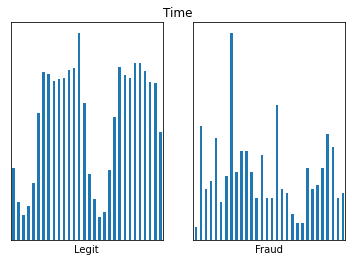

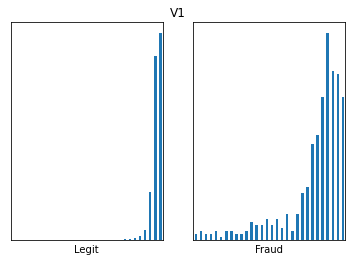

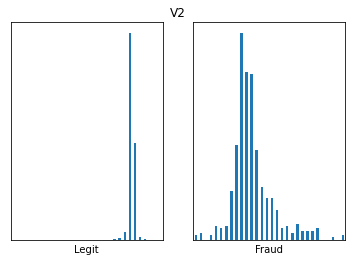

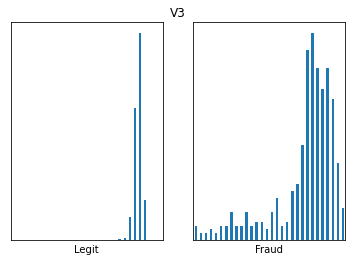

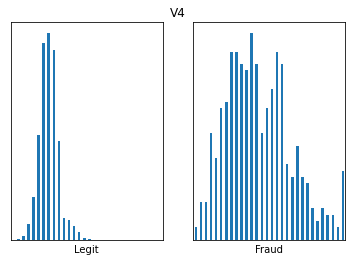

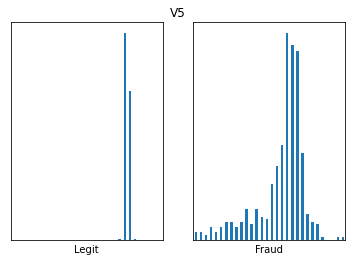

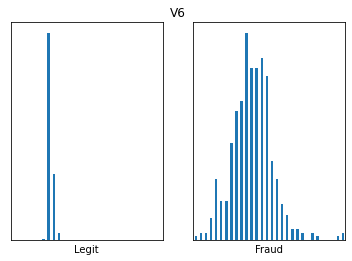

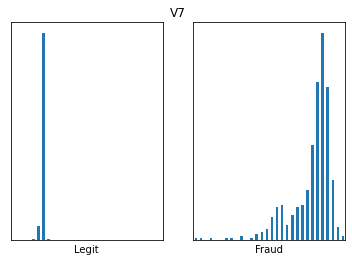

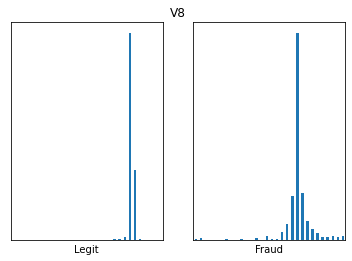

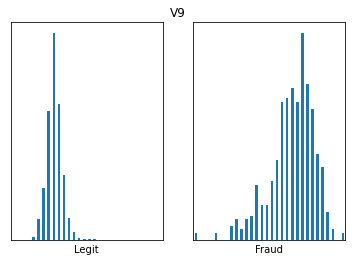

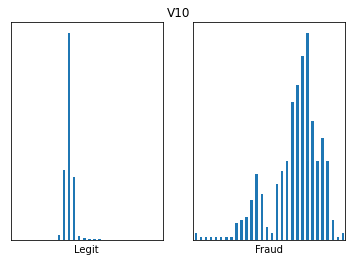

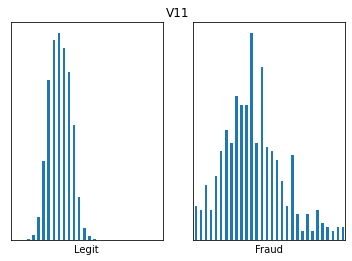

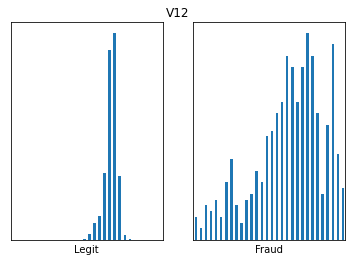

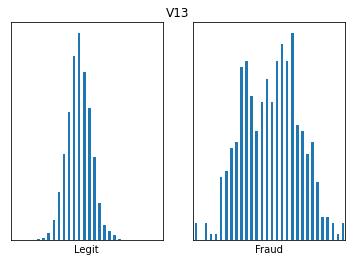

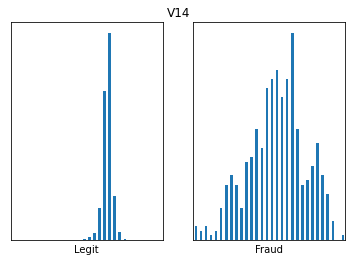

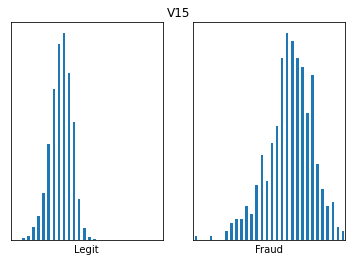

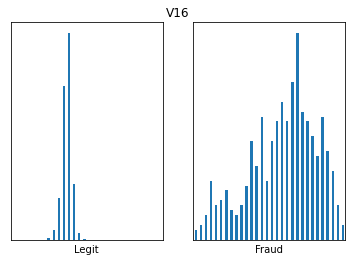

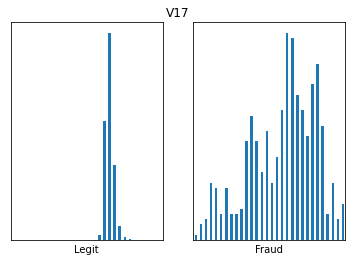

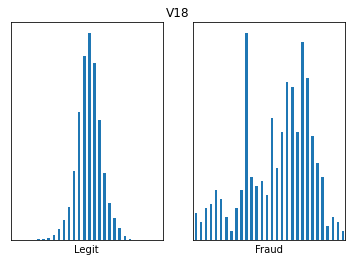

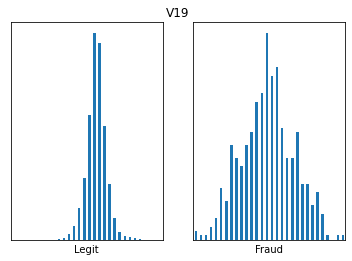

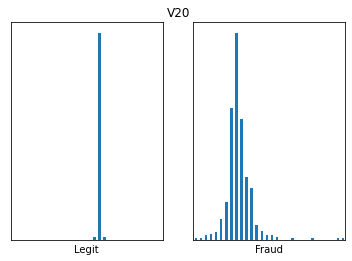

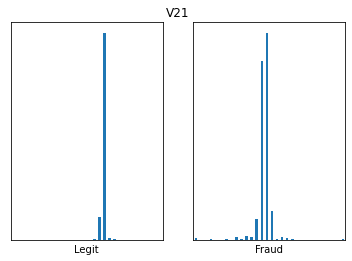

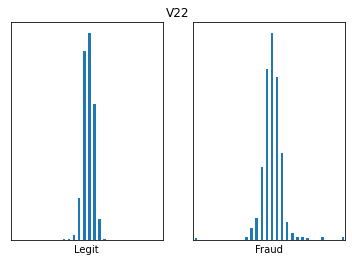

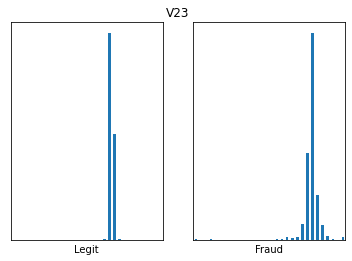

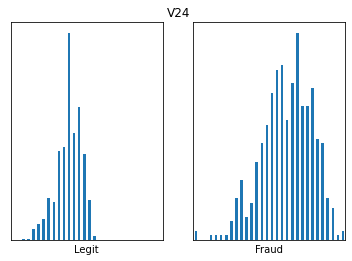

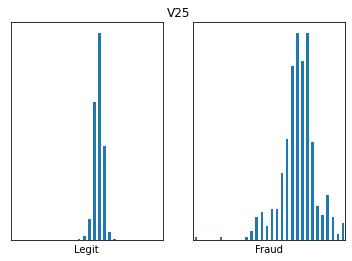

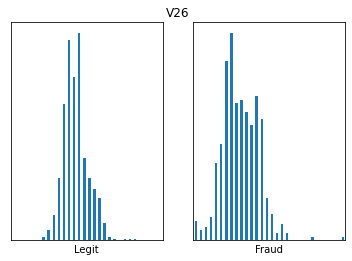

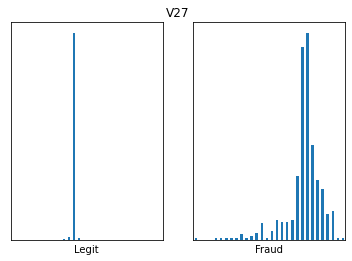

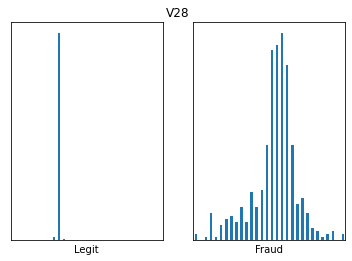

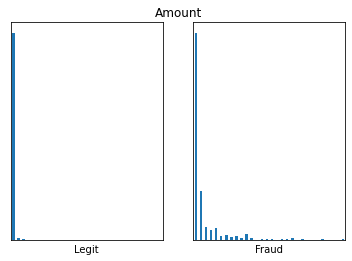

In [14]:
#if False:
for col in fraud.columns[0:-1]:
  hist_l = legit.select(col).rdd.flatMap(lambda x: x).histogram(30)
  hist_f = fraud.select(col).rdd.flatMap(lambda x: x).histogram(30)

  # Loading the Computed Histogram into a Pandas Dataframe for plotting
  fig = plt.figure()
  plt.title(col)
  plt.axis(False)
  ax_l = fig.add_subplot(1,2,1)
  ax_f = fig.add_subplot(1,2,2)
  pd.DataFrame( list(zip(*hist_l)),columns=['bin', 'frequency'] ) \
    .set_index('bin') \
    .plot(kind='bar', xlabel="Legit",ax=ax_l, xticks=[],yticks=[],legend=False)
  pd.DataFrame( list(zip(*hist_f)),columns=['bin', 'frequency']  ) \
    .set_index( 'bin' ) \
    .plot(kind='bar', xlabel="Fraud",ax=ax_f, xticks=[],yticks=[],legend=False);
  plt.show()

La differenza tra le due distribuzioni è meno evidente ad una analisi visiva, plottiamo quindi le prime features (che essendo risultato di una PCA sono responsabili della maggior parte della variazione) per essere sicuri della possibilità di separare le due classi.

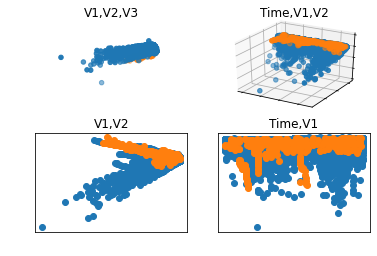

In [15]:
legit_x    =legit.select("V1").toPandas()
legit_y    =legit.select("V2").toPandas()
legit_z    =legit.select("V3").toPandas()
legit_time =legit.select("Time").toPandas()

fraud_x    =fraud.select("V1").toPandas()
fraud_y    =fraud.select("V2").toPandas()
fraud_z    =fraud.select("V3").toPandas()
fraud_time =fraud.select("Time").toPandas()

fig = plt.figure()
ax = fig.add_subplot(2,2,1,projection='3d')
ax.axis('off')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_title("V1,V2,V3")
ax.scatter(legit_x, legit_y, legit_z)
ax.scatter(fraud_x, fraud_y, fraud_z)

ax = fig.add_subplot(2,2,3)
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_title("V1,V2")
ax.scatter(legit_x, legit_y)
ax.scatter(fraud_x, fraud_y)

ax = fig.add_subplot(2,2,2,projection='3d')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_title("Time,V1,V2")
ax.scatter(legit_time, legit_x, legit_y)
ax.scatter(fraud_time, fraud_x, fraud_y)

ax = fig.add_subplot(2,2,4)
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_title("Time,V1")
ax.scatter(legit_time, legit_x)
ax.scatter(fraud_time, fraud_x)

plt.show()

Vediamo come le transazioni fraudolente siano all'interno dello spazio delle features contigue e abbastanza compatte. Inoltre il tempo è una feature che potrebbe risultare utile poiché le due classi sembrano avere maggiore variazione di V1 in corrispondenza di orari diversi.

## Classification

Visto che le due classi sono fortemente sbilanciate, il classificatore verrebbe principalmente addestrato su campioni appartenenti alla classe delle transazioni legittime, introducendo un bias indesiderato: tutte le transazioni verrebbero classificate come legittime. 
Per questo motivo utilizziamo delle tecniche per mitigare il problema.

In [16]:
# Definiamo una funzione per stampare l'area sotto la curva precision-recall e 
# la matrice di confusione per il training set.
from pyspark.ml.tuning import CrossValidator

def evaluate_model(cvModel, train, test, callable=True):
  evaluator = cvModel.getEvaluator()
  predictions = cvModel.transform(test)
  performance = cvModel.transform(train)
  summary = cvModel.bestModel.stages[2].summary() \
            if callable else cvModel.bestModel.stages[2].summary

  auprc = evaluator.evaluate(performance)
  print(f"Area Under PR Curve (train): {(100*auprc):05.2f}%")

  plt.figure(figsize=(5,5))
  plt.plot([0, 1], [0, 1], 'r--')
  plt.plot(summary.roc.select('FPR').collect(),
          summary.roc.select('TPR').collect())
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.title("Precision-Recall curve")
  plt.show()

  print("Test set results:")
  auprc = evaluator.evaluate(predictions)
  print(f"Area Under PR Curve:  {(100*auprc):05.2f}%")

  predictions.createOrReplaceTempView('predictions')
  tp = spark.sql("""SELECT COUNT(*) as c
                    FROM predictions
                    WHERE predictions.Class == 1 AND
                    predictions.prediction == 1.0 """).collect()[0].c
  print(f"True positives:       {tp}")
  fp = spark.sql("""SELECT COUNT(*) as c
                    FROM predictions
                    WHERE predictions.Class == 0 AND
                    predictions.prediction == 1.0 """).collect()[0].c
  print(f"False positives:      {fp}")
  tn = spark.sql("""SELECT COUNT(*) as c
                    FROM predictions
                    WHERE predictions.Class == 0 AND
                    predictions.prediction == 0.0 """).collect()[0].c
  print(f"True negatives:       {tn}")
  fn = spark.sql("""SELECT COUNT(*) as c
                    FROM predictions
                    WHERE predictions.Class == 1 AND
                    predictions.prediction == 0.0 """).collect()[0].c
  print(f"False negatives:      {fn}")

  sn.heatmap([[tp, fp],[fn,tn]], annot=True, fmt='.3g', cbar=False)\
   .set_title("Confusion matrix");

  precision = (tp)/(tp+fp)
  accuracy = (tp+tn)/(tp+tn+fp+fn)
  recall = (tp)/(tp+fn)
  print(f"Precision:            {precision:1.3f}")
  print(f"Accuracy:             {accuracy:1.3f}")
  print(f"Recall:               {recall:1.3f}")
  print(f"F1:                   {(2*precision*recall)/(precision+recall):1.3f}")
  

In [17]:
# L'evaluator sarà lo stesso per tutti i modelli
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator().setLabelCol("Class")\
                                           .setMetricName("areaUnderPR")

In [18]:
# Necessary imports for all methods

from pyspark.ml import Pipeline
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.feature import IndexToString
from pyspark.ml.feature import StringIndexer

# The two classifiers
from pyspark.ml.classification import LinearSVC
from pyspark.ml.classification import RandomForestClassifier 

### Undersampling

Nel training set sottocampioniamo gli elementi appartenenti alla classe dominante per non introdurre bias sulla frequenza relativa delle classi.

In [19]:
# Per ottenere train e test set tramite undersampling

def undersample_split(fraud, legit):
  train_f, test_f = fraud.randomSplit([0.8, 0.2])
  train_l, test_l = legit.randomSplit([0.8, 0.2])
  train_l = train_l.sample(False, 1.0*fraud.count()/legit.count()) \
      .limit (train_f.count())
  
  train       = train_f.union(train_l)
  test        = test_f.union(test_l)
  return (train, test)

train, test = undersample_split(fraud, legit)

##### Support vector machine 

Come primo approccio proviamo ad utilizzare come classificatore una support vector machine lineare, inoltre sottocampioniamo le transazioni legittime per non avere un dataset sbilanciato.

In [20]:
labelIndexer = StringIndexer(inputCol='Class',outputCol='Class_index').fit(train)

assembler = VectorAssembler().setInputCols(train.schema.names[0:-1])\
  .setOutputCol("features")
scaler = MinMaxScaler().setMin(0).setMax(1).setInputCol("features") \
  .setOutputCol("scaled_features")
linearSVC = LinearSVC().setFeaturesCol("scaled_features") \
  .setLabelCol("Class")
labelConverter = IndexToString(inputCol='prediction',outputCol='predictedLabel')\
  .setLabels(labelIndexer.labels)

pipeline = Pipeline().setStages([assembler, \
                                scaler, \
                                linearSVC,\
                                labelConverter])

In [21]:
# Costruiamo l'algoritmo di addestramento, come una 10-fold Cross-validation che si addestra su una 
# griglia di iperparametri:
# -- l'indice di Gini, e l'entropia per controlla la purezza dei nodi foglia
# -- il numero di bin cioè di categorie da generare per ogni feature categorica
# -- la profondità massima dell'albero

# Generiamo la griglia
paramGrid = ParamGridBuilder().addGrid(linearSVC.regParam, [0.1, 0.2, 0.5])\
                              .addGrid(linearSVC.maxIter, [20,50,100,200])\
                              .build()

In [22]:
cv = CrossValidator().setEstimator(pipeline)\
                     .setEvaluator(evaluator)\
                     .setEstimatorParamMaps(paramGrid)\
                     .setNumFolds(10)

In [23]:
cvModel_svm_us = cv.fit(train)

evaluate_model(cvModel_svm_us, train, test)
cvModel_svm_us.write().overwrite().save('svm_UF')

KeyboardInterrupt: ignored

L'85% delle frodi viene correttamente identificato, però 2/3 delle transazioni classificate come frodi sono in realtà transazioni legittime. Un tasso di falsi positivi così alto porta a perdere fiducia nello strumento diagnostico.

#### Random forest 

Confrontiamo il risultato precedente con una random forest, addestrata con gli stessi dati.

In [ ]:
labelIndexer = StringIndexer(inputCol='Class',outputCol='Class_index').fit(train)

assembler = VectorAssembler().setInputCols(train.schema.names[0:-1])\
  .setOutputCol("features")
scaler = MinMaxScaler().setMin(0).setMax(1).setInputCol("features") \
  .setOutputCol("scaled_features")
randomForest = RandomForestClassifier().setFeaturesCol("scaled_features") \
  .setLabelCol("Class")
labelConverter = IndexToString(inputCol='prediction',outputCol='predictedLabel')\
  .setLabels(labelIndexer.labels)
pipeline = Pipeline().setStages([assembler, \
                                scaler, \
                                randomForest,\
                                labelConverter])


In [ ]:
# Costruiamo l'algoritmo di addestramento, come una 10-fold Cross-validation che si addestra su una 
# griglia di iperparametri:
# -- l'indice di Gini, e l'entropia per controlla la purezza dei nodi foglia
# -- il numero di bin cioè di categorie da generare per ogni feature categorica
# -- la profondità massima dell'albero

# Generiamo la griglia
paramGrid = ParamGridBuilder().addGrid(randomForest.maxBins,[25, 28, 31])\
                              .addGrid(randomForest.maxDepth,[4,6,8])\
                              .addGrid(randomForest.impurity,["entropy","gini"])\
                              .build()

In [ ]:
cv = CrossValidator().setEstimator(pipeline)\
                     .setEvaluator(evaluator)\
                     .setEstimatorParamMaps(paramGrid)\
                     .setNumFolds(10)

cvModel_random_forest_us = cv.fit(train)

In [ ]:

evaluate_model(cvModel_random_forest_us, train, test, callable=False)
cvModel_random_forest_us.write().overwrite().save('random_forest_UF')

La random forest classifica correttamente molte più transazioni fraudolente, ma la precisione precipita sotto il 10%.

### Oversampling

Facendo undersampling non prendiamo in considerazione la maggior parte delle informazioni disponibili sulla classe dominante, portando a bassa capacità della rete di generalizzare, ricorriamo quindi ad oversampling.
Nel training set presentiamo più volte gli elementi appartenenti alla classe meno frequente per non introdurre bias sulla frequenza relativa delle classi.

Il test set viene estratto prima della duplicazione dei campioni per evitare di testare il classificatore sugli stessi dati su cui è stato testato.

In [24]:
# Per ottenere train e test set tramite undersampling
import math
def oversample_split(fraud, legit):
  train_f, test_f = fraud.randomSplit([0.8, 0.2])
  train_l, test_l = legit.randomSplit([0.8, 0.2])

  a = range(math.ceil(train_l.count()/train_f.count()))
    # duplicate the minority rows
  oversampled_train_f = train_f.withColumn("dummy", explode(array([lit(x) for x in a])))\
    .drop('dummy')
  # The train test is balanced with 50/50 frauds and legit transactions
  # to avoid bias towards legit transactions
  train       = oversampled_train_f.union(train_l)
  # The test set has the same distribution of the original dataset
  test        = test_f.union(test_l)
  return (train, test)
  
train, test = oversample_split(fraud, legit)

#### Support vector machine 

Come primo approccio proviamo ad utilizzare come classificatore una support vector machine lineare, inoltre sottocampioniamo le transazioni legittime per non avere un dataset sbilanciato.

In [ ]:
labelIndexer = StringIndexer(inputCol='Class',outputCol='Class_index').fit(train)

assembler = VectorAssembler().setInputCols(train.schema.names[0:-1])\
  .setOutputCol("features")
scaler = MinMaxScaler().setMin(0).setMax(1).setInputCol("features") \
  .setOutputCol("scaled_features")
linearSVC = LinearSVC().setFeaturesCol("scaled_features") \
  .setLabelCol("Class")
labelConverter = IndexToString(inputCol='prediction',outputCol='predictedLabel')\
  .setLabels(labelIndexer.labels)

pipeline = Pipeline().setStages([assembler, \
                                scaler, \
                                linearSVC,\
                                labelConverter])

In [ ]:
# Costruiamo l'algoritmo di addestramento, come una 10-fold Cross-validation che si addestra su una 
# griglia di iperparametri:
# -- l'indice di Gini, e l'entropia per controlla la purezza dei nodi foglia
# -- il numero di bin cioè di categorie da generare per ogni feature categorica
# -- la profondità massima dell'albero

# Generiamo la griglia
paramGrid = ParamGridBuilder().addGrid(linearSVC.regParam, [0.1, 0.2, 0.5])\
                              .addGrid(linearSVC.maxIter, [20,50,100,200])\
                              .build()

In [ ]:
cv = CrossValidator().setEstimator(pipeline)\
                     .setEvaluator(evaluator)\
                     .setEstimatorParamMaps(paramGrid)\
                     .setNumFolds(10)

In [ ]:
cvModel_svm_os = cv.fit(train)

evaluate_model(cvModel_svm_os, train, test)

In [ ]:
cvModel_svm_os.write().overwrite().save('svm_OF')

Il classificatore basato su SVM non mostra apprezzabili miglioramenti modificando la strategia di campionamento per il test set.

#### Random forest 

Confrontiamo il risultato precedente con una random forest, addestrata con gli stessi dati.

In [ ]:
labelIndexer = StringIndexer(inputCol='Class',outputCol='Class_index').fit(train)

assembler = VectorAssembler().setInputCols(train.schema.names[0:-1])\
  .setOutputCol("features")
scaler = MinMaxScaler().setMin(0).setMax(1).setInputCol("features") \
  .setOutputCol("scaled_features")
randomForest = RandomForestClassifier().setFeaturesCol("scaled_features") \
  .setLabelCol("Class")
labelConverter = IndexToString(inputCol='prediction',outputCol='predictedLabel')\
  .setLabels(labelIndexer.labels)
pipeline = Pipeline().setStages([assembler, \
                                scaler, \
                                randomForest,\
                                labelConverter])


In [ ]:
# Costruiamo l'algoritmo di addestramento, come una 10-fold Cross-validation che si addestra su una 
# griglia di iperparametri:
# -- l'indice di Gini, e l'entropia per controlla la purezza dei nodi foglia
# -- il numero di bin cioè di categorie da generare per ogni feature categorica
# -- la profondità massima dell'albero

# Generiamo la griglia
paramGrid = ParamGridBuilder().addGrid(randomForest.maxBins,[25, 28, 31])\
                              .addGrid(randomForest.maxDepth,[4,6,8])\
                              .addGrid(randomForest.impurity,["entropy","gini"])\
                              .build()

In [ ]:
cv = CrossValidator().setEstimator(pipeline)\
                     .setEvaluator(evaluator)\
                     .setEstimatorParamMaps(paramGrid)\
                     .setNumFolds(10)

cvModel_random_forest_os = cv.fit(train)

In [ ]:

evaluate_model(cvModel_random_forest_os, train, test, callable=False)
cvModel_random_forest_os.write().overwrite().save('random_forest_OF')

La random forest ha prestazioni superiori rispetto alla SVM.

### Selezione delle feature

I modelli precedenti si comportano abbastanza bene, soprattutto la random forest. L'addestramento sta però avvenendo su un sottoinsieme molto piccolo dei dati sulle transazioni legittime, potremmo quindi non catturare delle caratteristiche importanti dei dati. Risulta quindi opportuno provare un oversampling. 

L'addestramento con una porzione così grande del dataset con vettori di 30 feature però è una operazione molto pesante, ed è anche possibile che l'elevata dimensionalità riduca il potere di discriminazione dei modelli (curse of dimensionality). Effettuiamo quindi delle operazioni di estrazione delle features.

#### Sfruttamento dei modelli addestrati precedentemente

Dai modelli appena addestrati è possibile ottenere informazioni riguardo l'importanza delle varie features.


##### **SVM**

Visto che le feature provengono da una PCA sono linearmente non correlate tra loro, i pesi appresi dalla SVM possono quindi fornire informazione su quali feature sono più rilevanti per la separazione delle due classi.

In [ ]:
cvModel_svm_os.bestModel.stages[2].coefficients

Scaliamo il valore assoluto dei coefficienti per avere somma unitaria e li riportiamo nella tabella seguente 

Feature | Weight
-|-
 V14 | 0.1124 
 V28 | 0.1101 
 V2 | 0.0814 
 V4 | 0.0803 
 V20 | 0.0796 
 V11 | 0.0505 
 Amount | 0.0503 
 V6 | 0.0492 
 V12 | 0.0395 
 V9 | 0.0338 
 V10 | 0.0335 
 V7 | 0.0330 
 V23 | 0.0318 
 V27 | 0.0308 
 V5 | 0.0260 
 V1 | 0.0219 
 V3 | 0.0193 
 V16 | 0.0185 
 V21 | 0.0182 
 V17 | 0.0161 
 V19 | 0.0138 
 V18 | 0.0122 
 V25 | 0.0104 
 V24 | 0.0057 
 V22 | 0.0053 
 V26 | 0.0048 
 V8 | 0.0040 
 V13 | 0.0031 
 V15 | 0.0016 
 Time | 0.0014 


Le prime sei feature hanno più del 50% dell'importanza, e scartando le ultime 12 non si perde più del 10%.


In [ ]:
legit_x    =legit.select("V28").toPandas()
legit_y    =legit.select("V14").toPandas()
legit_z    =legit.select("V2").toPandas()

fraud_x    =fraud.select("V28").toPandas()
fraud_y    =fraud.select("V14").toPandas()
fraud_z    =fraud.select("V2").toPandas()

fig = plt.figure()
ax = fig.add_subplot(2,2,1,projection='3d')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_title("V28,V14,V2")
ax.scatter(legit_x, legit_y, legit_z)
ax.scatter(fraud_x, fraud_y, fraud_z)

ax = fig.add_subplot(2,2,2,projection='3d')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_title("V14,V28,V2")
ax.scatter(legit_y, legit_x, legit_z)
ax.scatter(fraud_y, fraud_x, fraud_z)

ax = fig.add_subplot(2,2,3,projection='3d')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_title("V28,V14,V2 (bottom view)")
ax.scatter(legit_x, legit_y, legit_z)
ax.scatter(fraud_x, fraud_y, -fraud_z)

ax = fig.add_subplot(2,2,4,projection='3d')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_title("V14,V28,V2 (bottom view)")
ax.scatter(legit_y, legit_x, legit_z)
ax.scatter(fraud_y, fraud_x, -fraud_z)

plt.show()

Osserviamo che considerando le sole tre features con i pesi maggiori è già possibile distinguere abbastanza nitidamente le due classi, meglio di quanto visto usando come features V1, V2, V3, e il Tempo, che effettivamente risultano essere abbastanza in basso nella lista ed eccezione di V2.

###### _Performance su un numero di feature ridotto:_

Proviamo ad addestrare la SVM utilizzando solamente le 6 feature associate a pesi maggiori.

In [ ]:
train, test = undersample_split(fraud, legit)


assembler = VectorAssembler().setInputCols(["V28", "V14", "V2",
                                            "V4" , "V11", "V20" ])\
  .setOutputCol("features")
scaler = MinMaxScaler().setMin(0).setMax(1).setInputCol("features") \
  .setOutputCol("scaled_features")
linearSVC = LinearSVC().setFeaturesCol("scaled_features") \
  .setLabelCol("Class")
labelConverter = IndexToString(inputCol='prediction',outputCol='predictedLabel')\
  .setLabels(labelIndexer.labels)

pipeline = Pipeline().setStages([assembler, \
                                scaler, \
                                linearSVC,\
                                labelConverter])

# Generiamo la griglia
paramGrid = ParamGridBuilder().addGrid(linearSVC.regParam, [0.1, 0.2, 0.5])\
                              .addGrid(linearSVC.maxIter, [20,50,100,200])\
                              .build()



In [ ]:
cv = CrossValidator().setEstimator(pipeline)\
                     .setEvaluator(evaluator)\
                     .setEstimatorParamMaps(paramGrid)\
                     .setNumFolds(10)

cvModel_svm_reduced = cv.fit(train)

In [ ]:
evaluate_model(cvModel_svm_reduced, train, test)

La performance del classificatore è leggermente aumentata rimuovendo le feature meno importanti.

##### **Random Forest**

Ripetiamo un procedimento simile sulla random forest, che precedentemente dava migliori risultati nella classificazione.

In [ ]:
cvModel_random_forest_os.bestModel.stages[2].featureImportances

Per comodità di visione si riportano i dati in output al comando precedente anche in formato tabellare.

Feature | Importance
-|-
   V14 |  0.2576 
  V17 |  0.1472 
  V10 |  0.1304 
  V12 |  0.1098 
  V11 |  0.0975 
  V4 |  0.0638 
  V16 |  0.034  
  V8 |  0.0176 
  V3 |  0.0162 
  V20 |  0.0153 
  Amount |  0.0117  
  V2 |  0.0115 
  V26 |  0.0086 
  V23 |  0.007  
  V19 |  0.0078 
  V9 |  0.0071 
  V21 |  0.006  
  V13 |  0.0065 
  V1 |  0.0056 
  V28 |  0.0051 
  V15 |  0.004
  V7 |  0.0043 
  V25 |  0.0043 
  Time |  0.003  
  V22 |  0.0037 
  V18 |  0.0032 
  V5 |  0.0031 
  V27 |  0.0029 
  V6 |  0.0027 
  V24 |  0.0026


Le prime tre features da sole hanno il 50% dell'importanza, e per arrivare al 90% bastano le prime 11

In [ ]:
legit_x    =legit.select("V14").toPandas()
legit_y    =legit.select("V17").toPandas()
legit_z    =legit.select("V10").toPandas()

fraud_x    =fraud.select("V14").toPandas()
fraud_y    =fraud.select("V17").toPandas()
fraud_z    =fraud.select("V10").toPandas()

fig = plt.figure()
ax = fig.add_subplot(2,2,1,projection='3d')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_title("V14,V17,V10")
ax.scatter(legit_x, legit_y, legit_z)
ax.scatter(fraud_x, fraud_y, fraud_z)

ax = fig.add_subplot(2,2,2,projection='3d')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_title("V17,V14,V10")
ax.scatter(legit_y, legit_x, legit_z)
ax.scatter(fraud_y, fraud_x, fraud_z)

ax = fig.add_subplot(2,2,3,projection='3d')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_title("V14,V17,V10 (bottom view)")
ax.scatter(legit_x, legit_y, legit_z)
ax.scatter(fraud_x, fraud_y, -fraud_z)

ax = fig.add_subplot(2,2,4,projection='3d')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_title("V17,V14,V10 (bottom view)")
ax.scatter(legit_y, legit_x, legit_z)
ax.scatter(fraud_y, fraud_x, -fraud_z)

plt.show()

Ad una ispezione visiva sembra evidente come, utilizzando le prime tre feature, le due classi risultino meglio separate di quanto non succedesse per la SVM.

###### _Performance su numero di feature ridotto_:
Proviamo ad addestrare la random forest utilizzando soltanto le prime tre feature

In [ ]:
assembler = VectorAssembler().setInputCols(["V14","V17","V10" ])\
  .setOutputCol("features")
scaler = MinMaxScaler().setMin(0).setMax(1).setInputCol("features") \
  .setOutputCol("scaled_features")
randomForest = RandomForestClassifier().setFeaturesCol("scaled_features") \
  .setLabelCol("Class")
labelConverter = IndexToString(inputCol='prediction',outputCol='predictedLabel')\
  .setLabels(labelIndexer.labels)
pipeline = Pipeline().setStages([assembler, \
                                scaler, \
                                randomForest,\
                                labelConverter])

paramGrid = ParamGridBuilder().addGrid(randomForest.maxBins,[25, 28, 31])\
                              .addGrid(randomForest.maxDepth,[4,6,8])\
                              .addGrid(randomForest.impurity,["entropy","gini"])\
                              .build()

In [ ]:
cv = CrossValidator().setEstimator(pipeline)\
                     .setEvaluator(evaluator)\
                     .setEstimatorParamMaps(paramGrid)\
                     .setNumFolds(10)
                     
cvModel_random_forest_reduced = cv.fit(train)

In [ ]:
evaluate_model(cvModel_random_forest_reduced, train, test, callable=False)

Vediamo come usare soltanto le prime tre feature permette di ottenere risultati estremamente vicini a quelli ottenuti usando tutte e trenta le feature.